## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-03-31 19:25:17.051307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-31 19:25:17.342391: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 19:25:18.126366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-03-31 19:25:18.126579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [5]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Data Preprocessing

### Training Image Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


2025-03-31 19:26:34.144622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 82.    72.25  77.  ]
   [ 80.    71.    75.  ]
   [ 79.    69.75  74.  ]
   ...
   [ 88.    77.    84.  ]
   [ 91.25  79.5   87.25]
   [ 86.25  75.75  82.25]]

  [[156.25 142.75 149.75]
   [155.75 142.25 149.25]
   [154.5  141.   148.  ]
   ...
   [168.75 155.75 164.75]
   [177.75 164.75 173.75]
   [169.   156.   165.  ]]

  [[155.25 138.   146.  ]
   [156.25 139.   147.  ]
   [166.75 149.5  157.5 ]
   ...
   [176.75 160.75 170.75]
   [183.25 167.25 177.25]
   [170.75 154.75 164.75]]

  ...

  [[137.   118.   124.  ]
   [159.25 140.25 146.25]
   [160.75 141.75 147.75]
   ...
   [176.   161.   168.  ]
   [178.25 163.25 170.25]
   [184.   169.   176.  ]]

  [[147.75 128.75 134.75]
   [171.   152.   158.  ]
   [154.75 135.75 141.75]
   ...
   [191.25 176.25 183.25]
   [160.25 145.25 152.25]
   [175.   160.   167.  ]]

  [[154.75 135.75 141.75]
   [164.75 145.75 151.75]
   [155.   136.   142.  ]
   ...
   [165.25 150.25 157.25]
   [181.5  166.5  173.5 ]
   [168.25 153.25 16

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
## Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [23]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-03-31 19:28:24.972945: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2025-03-31 19:28:25.033973: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 65028096 exceeds 10% of free system memory.
2025-03-31 19:28:25.106739: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 32514048 exceeds 10% of free system memory.
2025-03-31 19:28:25.130813: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30482432 exceeds 10% of free system memory.
2025-03-31 19:28:25.704280: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25288704 exceeds 10% of free system memory.


2197/2197 [==============================] - 2885s 1s/step - loss: 1.3693 - accuracy: 0.5975 - val_loss: 0.5162 - val_accuracy: 0.8352
Epoch 2/10
2197/2197 [==============================] - 3036s 1s/step - loss: 0.4588 - accuracy: 0.8549 - val_loss: 0.2515 - val_accuracy: 0.9200
Epoch 3/10
2197/2197 [==============================] - 3534s 2s/step - loss: 0.2736 - accuracy: 0.9114 - val_loss: 0.1718 - val_accuracy: 0.9439
Epoch 4/10
2197/2197 [==============================] - 3250s 1s/step - loss: 0.1886 - accuracy: 0.9376 - val_loss: 0.1960 - val_accuracy: 0.9356
Epoch 5/10
2197/2197 [==============================] - 3324s 2s/step - loss: 0.1391 - accuracy: 0.9541 - val_loss: 0.1259 - val_accuracy: 0.9594
Epoch 6/10
2197/2197 [==============================] - 3615s 2s/step - loss: 0.1096 - accuracy: 0.9646 - val_loss: 0.1160 - val_accuracy: 0.9628
Epoch 7/10
2197/2197 [==============================] - 3533s 2s/step - loss: 0.0863 - accuracy: 0.9714 - val_loss: 0.1254 - val_accura

## Model Evaluation

In [26]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 409s 186ms/step - loss: 0.0624 - accuracy: 0.9802


In [27]:
print(train_loss,train_acc)

0.062425702810287476 0.9802262187004089


In [28]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 103s 188ms/step - loss: 0.1629 - accuracy: 0.9516


In [29]:
print(val_loss,val_acc)

0.16292481124401093 0.9516276121139526


### Saving Model

In [30]:
model.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [1.3692692518234253,
  0.45875611901283264,
  0.27359166741371155,
  0.18863694369792938,
  0.13909859955310822,
  0.10961863398551941,
  0.08625946193933487,
  0.07410761713981628,
  0.06072656437754631,
  0.05786694586277008],
 'accuracy': [0.5975247025489807,
  0.8549256920814514,
  0.9113592505455017,
  0.9376200437545776,
  0.9541361331939697,
  0.964648962020874,
  0.9714488983154297,
  0.9747776985168457,
  0.9801550507545471,
  0.9819048047065735],
 'val_loss': [0.5162416696548462,
  0.2515049874782562,
  0.1718243807554245,
  0.1959862858057022,
  0.12586267292499542,
  0.11598119139671326,
  0.12538562715053558,
  0.10646644234657288,
  0.13408757746219635,
  0.16292469203472137],
 'val_accuracy': [0.8352492451667786,
  0.9200432300567627,
  0.9438880085945129,
  0.9356362223625183,
  0.9593671560287476,
  0.9627817273139954,
  0.9606191515922546,
  0.965740978717804,
  0.961586594581604,
  0.9516276121139526]}

In [32]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [33]:
training_history.history['val_accuracy']

[0.8352492451667786,
 0.9200432300567627,
 0.9438880085945129,
 0.9356362223625183,
 0.9593671560287476,
 0.9627817273139954,
 0.9606191515922546,
 0.965740978717804,
 0.961586594581604,
 0.9516276121139526]

### Accuracy Visualization

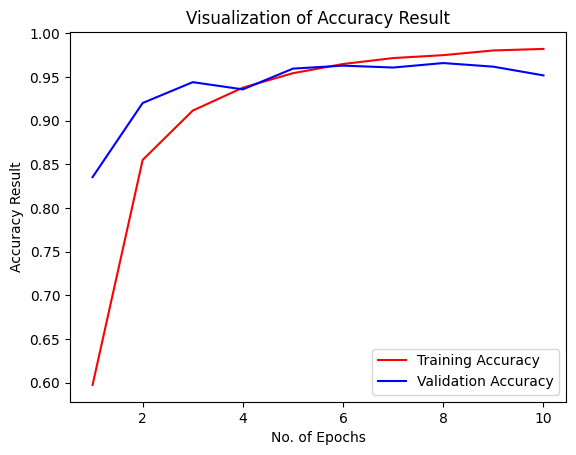

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 110s 200ms/step


(array([[9.9990600e-01, 1.2330639e-05, 4.0647897e-08, ..., 1.3113238e-12,
         8.6064714e-12, 2.0370268e-09],
        [9.9999839e-01, 1.3735416e-06, 2.1322768e-09, ..., 1.8018811e-15,
         1.0097074e-12, 1.0945166e-12],
        [9.9999994e-01, 7.8293084e-12, 4.1727670e-11, ..., 1.1120013e-18,
         1.6641388e-15, 3.5535200e-11],
        ...,
        [2.4163360e-10, 1.3764353e-13, 1.6237217e-10, ..., 9.2773749e-12,
         1.6106139e-12, 9.9999988e-01],
        [2.7513619e-12, 1.5260858e-16, 9.5036419e-14, ..., 8.1170862e-15,
         5.7797484e-15, 1.0000000e+00],
        [1.8971371e-16, 2.5070417e-19, 1.6871886e-15, ..., 1.6845622e-18,
         4.5475396e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

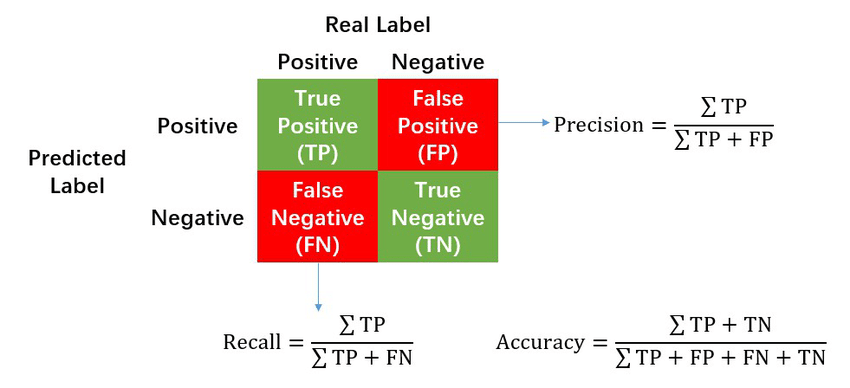

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.88      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.87      0.98      0.92       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.91       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[444,   7,   1, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 436,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

### Confusion Matrix Visualization

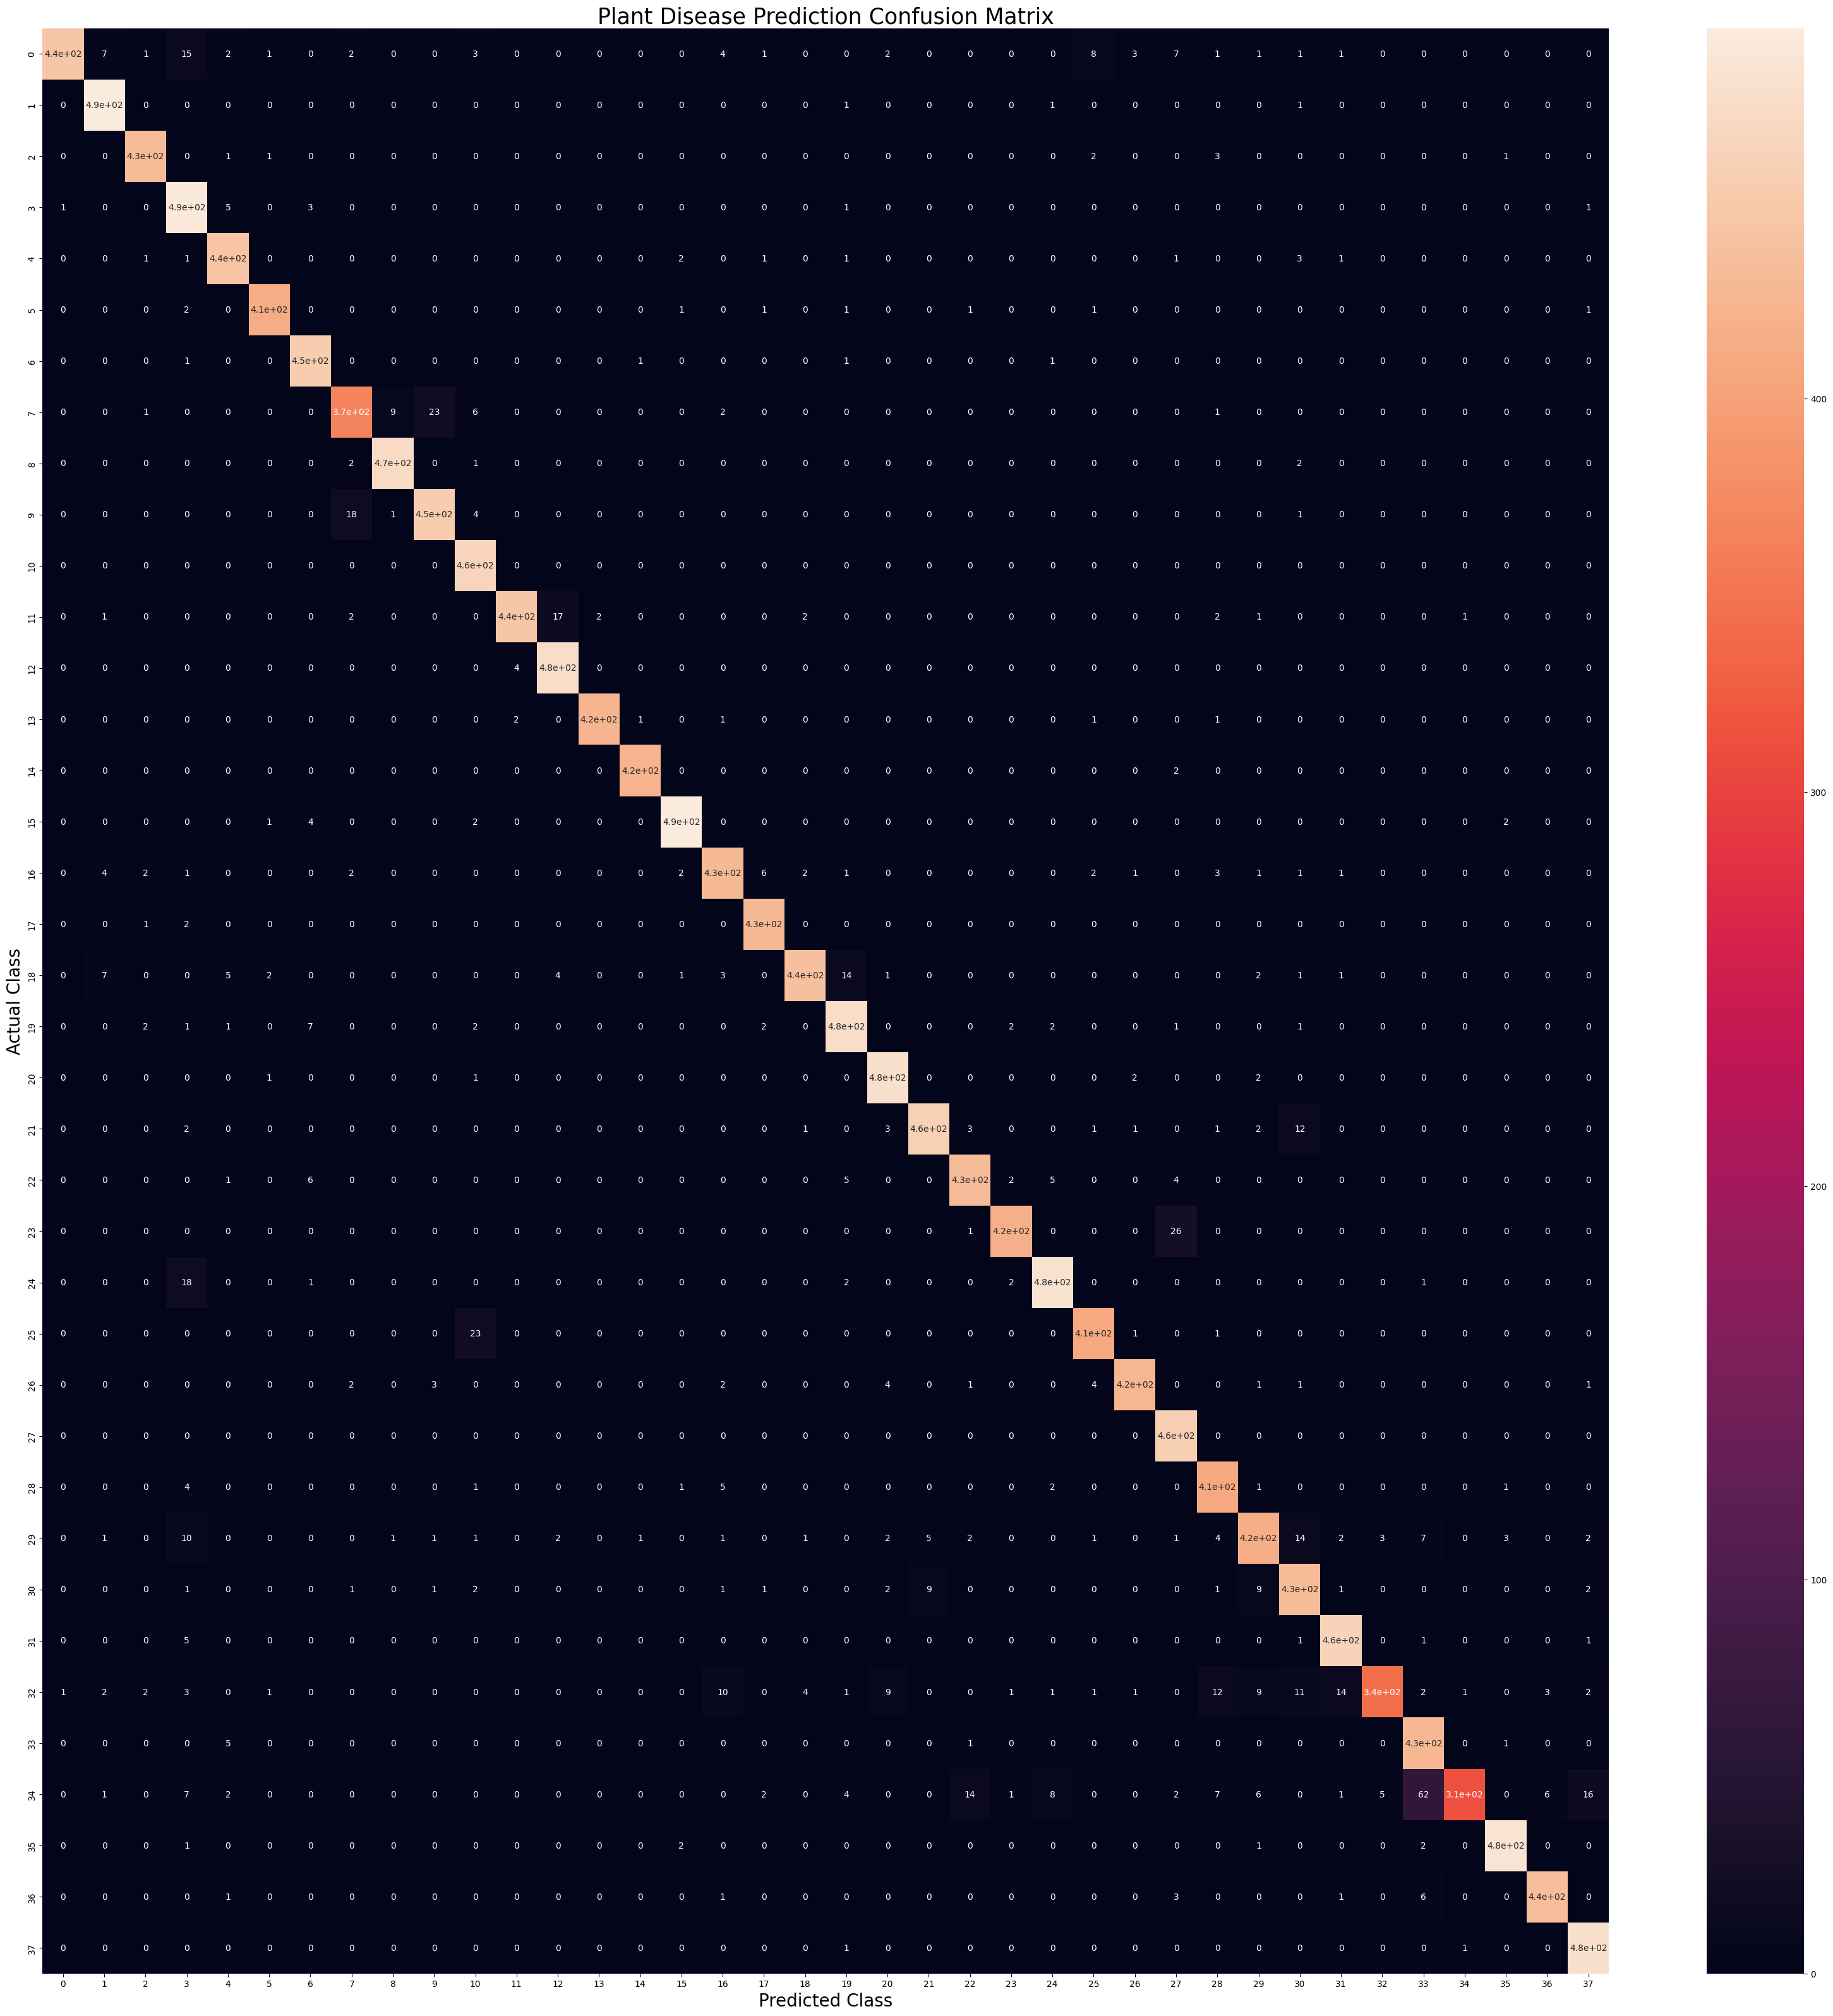

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()